# Experiment 1: Rat Mapping (2D)

In this tutorial, we will use the `optim-neurostim` library for a 2D optimization.
We will use a rat dataset, where stimuli delivered in the rat motor cortex are associated with 

## Step 1: Download dependencies

In [5]:
from IPython.display import Image, display
from PIL import Image as PIL_Image
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'size': 16} 
matplotlib.rc('font', **font)

In [8]:
%cd ..

C:\Users\p117258\Documents\GitHub\EduOptimNeurostimDev


In [2]:
#!pip install GPy

Python 3.9.12


## Step 2: Download the dataset

In [9]:
!bash scripts/download_nhp_rat_dataset.sh data


~~~
Downloaded rat and NHP data successfully!
Ran on:      MINGW64_NT-10.0-22000 LAPTOP-M5001-01 3.3.5-341.x86_64
Duration:    0hrs 2min 2sec
~~~


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   469  100   469    0     0    762      0 --:--:-- --:--:-- --:--:--   763

  0  141M    0 27507    0     0  16205      0  2:32:16  0:00:01  2:32:15 16205
  1  141M    1 2395k    0     0  1096k      0  0:02:11  0:00:02  0:02:09 4852k
  5  141M    5 8315k    0     0  2584k      0  0:00:55  0:00:03  0:00:52 5449k
 10  141M   10 14.1M    0     0  3462k      0  0:00:41  0:00:04  0:00:37 5813k
 14  141M   14 20.0M    0     0  3957k      0  0:00:36  0:00:05  0:00:31 5874k
 18  141M   18 25.4M    0     0  4213k      0  0:00:34  0:00:06  0:00:28 5800k
 21  141M   21 30.6M    0     0  4366k      0  0:00:33  0:00:07  0:00:26 5795k
 25  141M   25 36.4M    0     0  4555k      0  0:0

## Step 3: Configuration file

In `optim-neurostim`, the training is orchestrated by a configuration file, a JSON file containing all the necessary parameters. In-depth documentation on using the configuration file is available [here](TODO). Some examples of configuration files are available in the `optim-neurostim/examples/` folder [here](TODO).

In this tutorial for Experiment 1, we will be using the configuration file: `optim-neurostim/examples/rat_mapping_2D.json`. This is already downloaded for you and can be seen under Colab's `Files` (📁) tab on the left.

Open this file and follow on for more information on some of the key parameters for performing the 2D rat mapping:

1. `seed` - The random seed for the experiment which enables reproducibility. We use `0` throughout all experiments.
> `"seed": 0`

2. `output_path` - The name of the folder that will be populated by the output files (e.g. the trained object, relevant plots, etc.)
> `"path_output": "output/rat_mapping_2D"`

3. `prior:path` - The path to the prior object (`.mat`). We released a few prior objects for experimentation purposes and to speed-up training and these can be found under the `optim-neurostim/priors/` folder. In this experiment, we don't utilize any prior so we leave it empty.
> `"path": null`

4. `data:dataset_path` - The location to the dataset.
> `"dataset_path": "data/rat"`

5. `acquisition:kappa:values` - The values to assess in hyperparameter optimization for UCB acquisition function's kappa parameter.
> `"values": [1.0, 1.5, 2, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]`

6. `acquisition:kappa:find_best` - Setting this parameter to true will enable hyperparameter optimization for the corresponding hyperparameter, e.g. `kappa` for this case.
> `"find_best": true`

7. `optimization:name` - The name of the optimization algorithm, which should be one of `gpbo`, `extensive`, or `greedy`. For this experiment, we will show GPBO.
> `"name": "gpbo"`

8. `optimization:n_repetitions` - Number of repetitions for the optimization algorithm.
> `"n_repetitions": 30`


## Step 4: Run optimization on one animal

Using the given config file and given that the best hyperparameter value for `kappa` is $3.0$, let's first run optimization on one new animal. We do this by passing `"{'kappa': 3.0}"` or equivalently `output/rat_mapping_2D/best_hyperparams.pkl` (i.e. path to the trained hyperparameter object) to the `-hp` flag.

Note, in some setups we encountered an "OMP: Error #15" A workaround to that error is running the following two lines (once):
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [12]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

!python main.py -c config/rat_mapping_2D.json \
                -nm 1 \
                -op output/rat_mapping_2D_one_animal \
                -hp "{'kappa': 3.0}" \
                -val 

Dataset (sub:muscle):  ['rat1_M1_190716:0']
Hooray! Succesfully saved output files to output/rat_mapping_2D_one_animal.



Iterating over muscles: 100%|##########| 1/1 [00:35<00:00, 35.26s/it]


We can quickly check the performance through the saved CSV file.

In [69]:
df_gpbo = pd.read_csv('output/rat_mapping_2D_one_animal/gpbo_performance.csv', index_col='queries')
df_gpbo = df_gpbo[['exploration', 'exploitation']].T
df_gpbo

queries             1         2         3         4         5         6   \
exploration   0.126187  0.180627  0.215958  0.228713  0.236924  0.268182   
exploitation  0.126187  0.125810  0.122897  0.110213  0.120547  0.131532   

queries             7         8         9         10  ...        23        24  \
exploration   0.438065  0.474721  0.506734  0.562214  ...  0.789976  0.795635   
exploitation  0.359916  0.188693  0.246410  0.371628  ...  0.778765  0.779674   

queries             25        26        27        28        29        30  \
exploration   0.788496  0.815921  0.810263  0.820070  0.849531  0.849531   
exploitation  0.784107  0.809371  0.815921  0.816076  0.848878  0.809998   

queries             31        32  
exploration   0.849531  0.849531  
exploitation  0.839892  0.841563  

[2 rows x 32 columns]

Let's see what the `y_mu_mapped` looks like. This is the output of GP, `y_mu`, mapped to the dimensions of the problem. 

(8, 4)


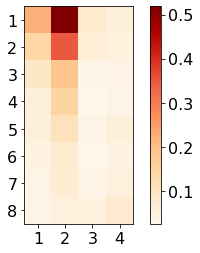

In [70]:
y_mu_mapped_arr = np.squeeze(np.load('output/rat_mapping_2D_one_animal/y_mu_mapped_arr.npy'))
print(y_mu_mapped_arr.shape)  
# NOTE: y_mu_mapped_arr is in shape (num_hyperparams, num_muscles, *system_shape) or (*system.shape) if squeeze-able
plt.xticks(range(4), range(1, 5))
plt.yticks(range(8), range(1, 9))
plt.imshow(y_mu_mapped_arr, cmap='OrRd')
plt.colorbar()
plt.show()

Let's see what algorithmic performance vs. num. queries looks like. This is essentially the same as the CSV above, but plotted nicely.

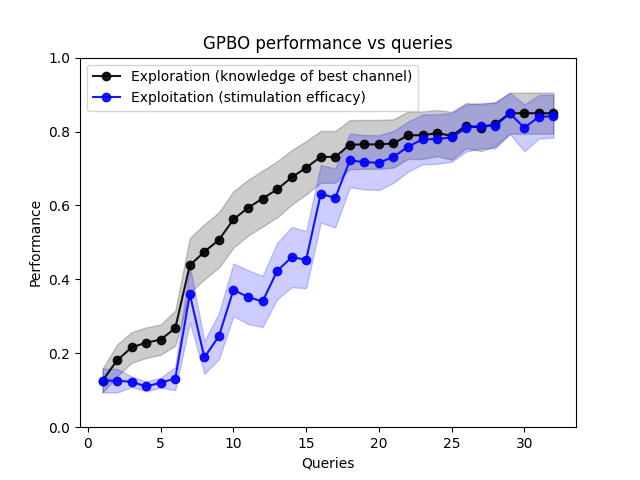

In [71]:
display(Image('output/rat_mapping_2D_one_animal/performance_vs_queries.png'))

In [72]:
channel_values_arr = np.squeeze(np.load('output/rat_mapping_2D_one_animal/channel_values_arr.npy'))
print(channel_values_arr.shape)  
print('First repetition first query channel values: ', channel_values_arr[0, 0])
# NOTE: channel_values_arr is in shape (num_hyperparams, num_muscles, num_repetitions, num_queries, num_dims)

(30, 32, 2)
First repetition first query channel values:  [7. 2.]


Let's now run GPBO again but with the `-gpu` flag enabled and compare the two results. \
(Note: if you don't have a GPU, it will run anyway on your CPU, but you won't have a gain in execution time).

In [74]:
!python main.py -c config/rat_mapping_2D.json \
                -nm 1 \
                -op output/rat_mapping_2D_one_animal_gpu \
                -hp "{'kappa': 3.0}" \
                -val \
                -gpu

Dataset (sub:muscle):  ['rat1_M1_190716:0']
Hooray! Succesfully saved output files to output/rat_mapping_2D_one_animal_gpu. 


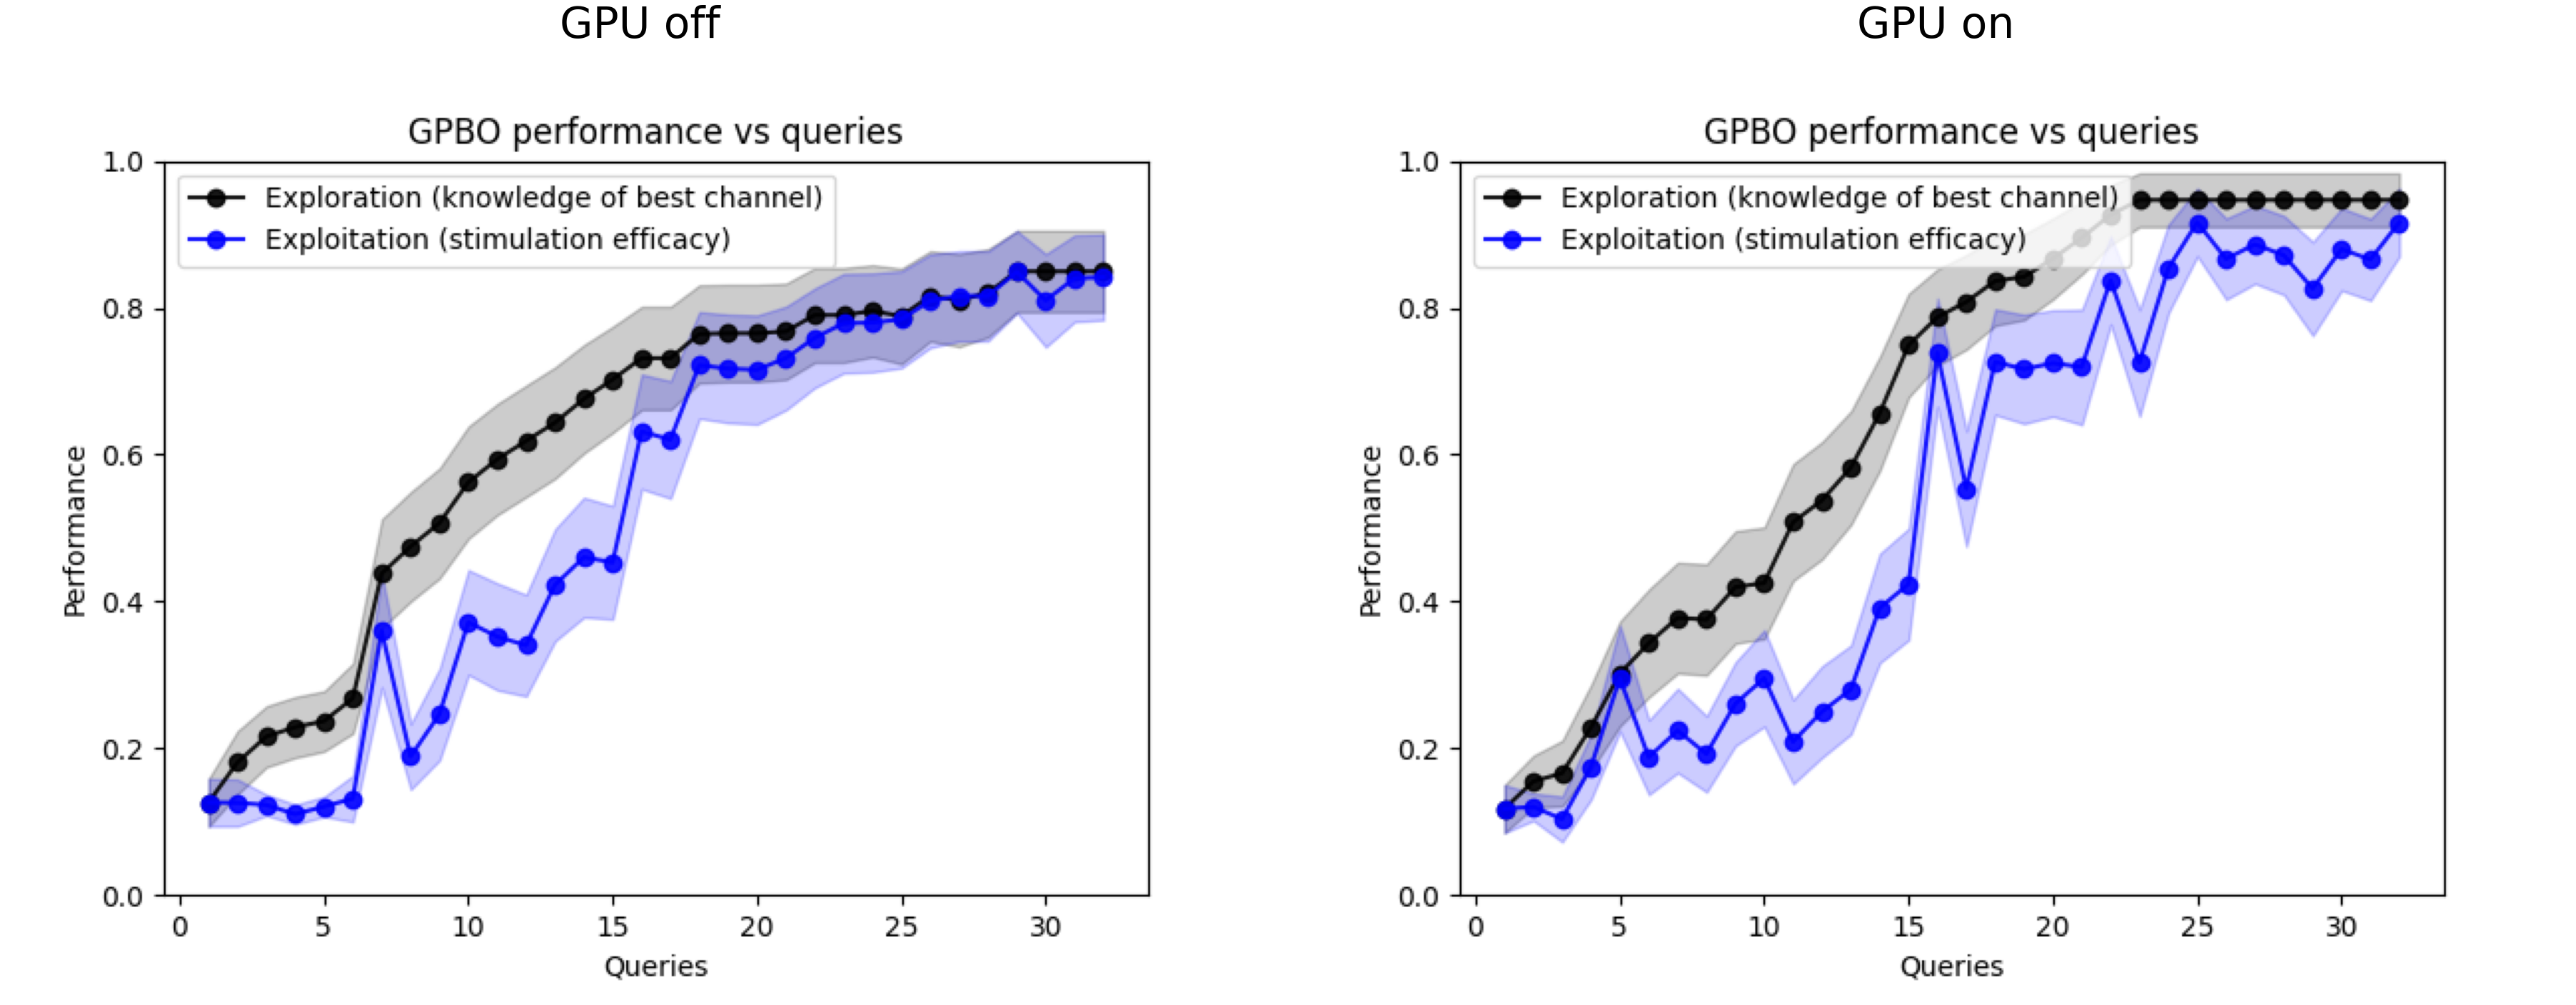

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/rat_mapping_2D_one_animal/performance_vs_queries.png'))
ax[0].axis('off')
ax[0].set_title('GPU off', fontsize=60)
ax[1].imshow(PIL_Image.open('output/rat_mapping_2D_one_animal_gpu/performance_vs_queries.png'))
ax[1].axis('off')
ax[1].set_title('GPU on', fontsize=60)
plt.show()

Now, let's run the same pipeline, but using the **extensive** search algorithm instead of the **GPBO** search algorithm as employed before.

In [233]:
!python main.py -c config/rat_mapping_2D.json \
                -nm 1 \
                -alg extensive \
                -op output/rat_mapping_2D_one_animal_extensive \
                -hp "{'kappa': 3.0}" \
                -val 

Hooray! Succesfully saved output files to output/rat_mapping_2D_one_animal_extensive.


We can quickly check the performance through the saved CSV file.

In [234]:
df_extensive = pd.read_csv('output/rat_mapping_2D_one_animal_extensive/extensive_performance.csv', index_col='queries')
df_extensive = df_extensive[['exploration', 'exploitation']].T
df_extensive

queries             1         2         3         4         5         6   \
exploration   0.113776  0.189727  0.208419  0.240233  0.250868  0.316925   
exploitation  0.113776  0.142984  0.096784  0.113263  0.082997  0.169300   

queries             7         8         9         10  ...        23        24  \
exploration   0.348997  0.318567  0.321650  0.352884  ...  0.567986  0.564766   
exploitation  0.127714  0.085371  0.110217  0.117873  ...  0.105674  0.085638   

queries             25        26        27       28       29       30  \
exploration   0.585052  0.635871  0.723570  0.72357  0.72357  0.72357   
exploitation  0.113845  0.187789  0.186523  0.09708  0.09137  0.12784   

queries             31        32  
exploration   0.762186  0.762186  
exploitation  0.141457  0.128643  

[2 rows x 32 columns]

Let's see what algorithmic performance vs. num. queries looks like. This is essentially the same as the CSV above, but plotted nicely.

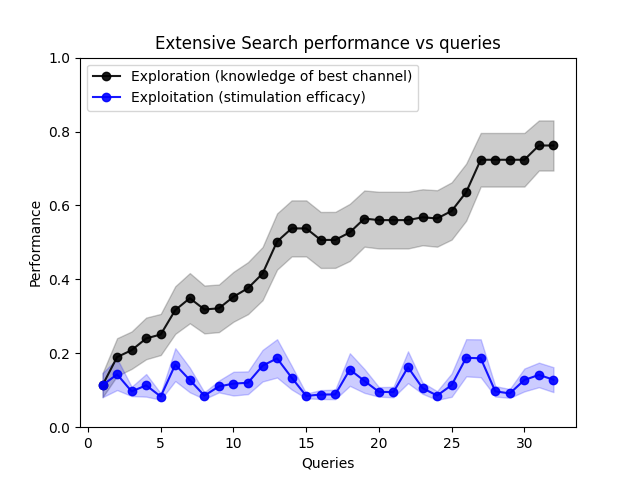

In [235]:
display(Image('output/rat_mapping_2D_one_animal_extensive/performance_vs_queries.png'))

Now, let's run the same pipeline, but using the **greedy** search algorithm instead of the **GPBO** search algorithm as employed before.

In [236]:
!python main.py -c config/rat_mapping_2D.json \
                -nm 1 \
                -alg greedy \
                -op output/rat_mapping_2D_one_animal_greedy \
                -hp "{'kappa': 3.0}" \
                -val

Hooray! Succesfully saved output files to output/rat_mapping_2D_one_animal_greedy.


In [237]:
df_greedy = pd.read_csv('output/rat_mapping_2D_one_animal_greedy/greedy_performance.csv', index_col='queries')
df_greedy = df_greedy[['exploration', 'exploitation']].T
df_greedy

queries             1         2         3         4         5         6   \
exploration   0.129328  0.143192  0.197629  0.232567  0.242374  0.279912   
exploitation  0.129328  0.120948  0.146861  0.142710  0.228658  0.140488   

queries             7         8         9         10  ...        23        24  \
exploration   0.323853  0.340448  0.340239  0.426665  ...  0.653255  0.681224   
exploitation  0.191735  0.158013  0.153474  0.207026  ...  0.155929  0.158421   

queries             25        26        27        28        29        30  \
exploration   0.708333  0.708048  0.739862  0.739862  0.739862  0.739862   
exploitation  0.188319  0.109913  0.142121  0.115693  0.130693  0.091686   

queries             31        32  
exploration   0.739862  0.739862  
exploitation  0.086469  0.111697  

[2 rows x 32 columns]

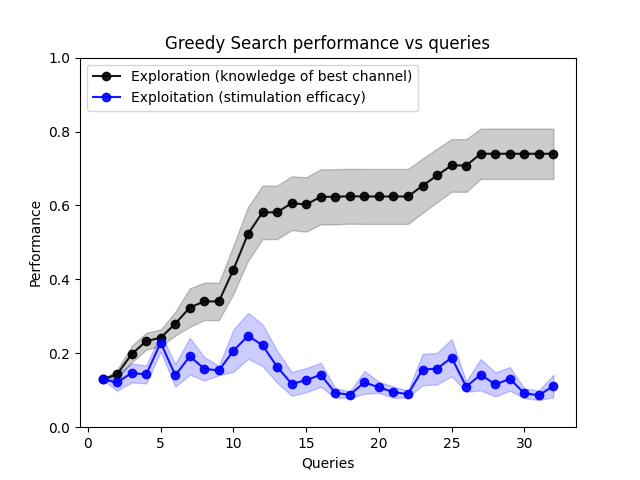

In [238]:
display(Image('output/rat_mapping_2D_one_animal_greedy/performance_vs_queries.png'))

Finally, we can compare the two algorithms on the same plot for (i) exploration and (ii) exploitation using the command given below.

In [239]:
!python scripts/compare_and_plot.py -r1 output/rat_mapping_2D_one_animal \
                                    -r2 output/rat_mapping_2D_one_animal_extensive \
                                    -r3 output/rat_mapping_2D_one_animal_greedy

Hooray! Successfully compared and plotted the two runs!


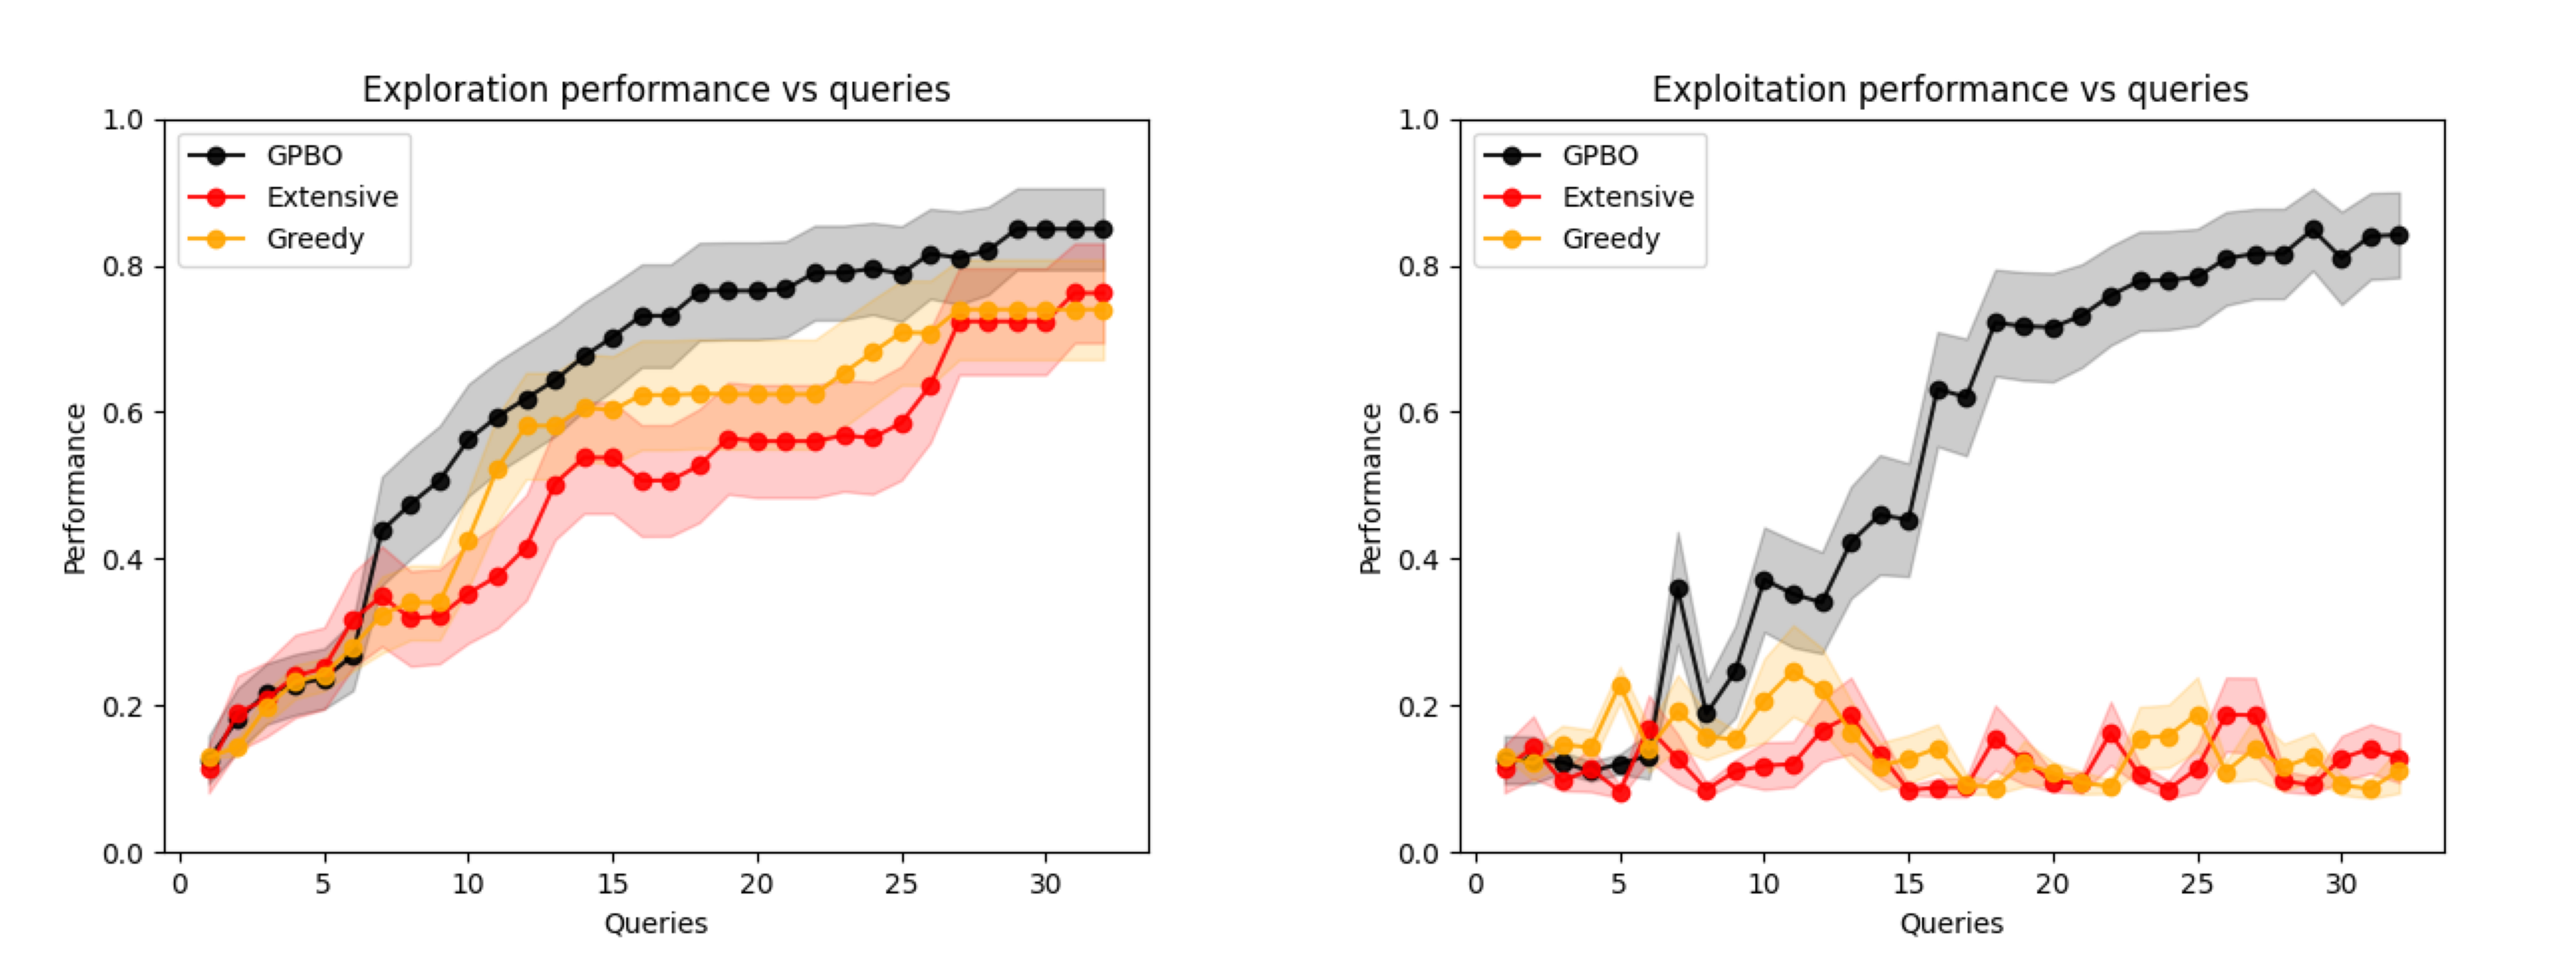

In [240]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/rat_mapping_2D_one_animal/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/rat_mapping_2D_one_animal/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Step 5: Run optimization on several validation animals

We now do the same, but with several validation animals.

In [203]:
!python main.py -c config/rat_mapping_2D.json \
                -nm 10 \
                -op output/rat_mapping_2D_several_animals \
                -hp "{'kappa': 3.0}" \
                -val

Iterating over repetitions:   3%|▌               | 1/30 [00:01<00:36,  1.27s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/paramz/transformations.py:119: RuntimeWarning:overflow encountered in expm1
Hooray! Succesfully saved output files to output/rat_mapping_2D_several_animals.


We can quickly check the performance through the saved CSV file.

In [204]:
df_gpbo = pd.read_csv('output/rat_mapping_2D_several_animals/gpbo_performance.csv', index_col='queries')
df_gpbo = df_gpbo[['exploration', 'exploitation']].T
df_gpbo

queries             1         2         3         4         5         6   \
exploration   0.422851  0.507812  0.553687  0.571578  0.579721  0.582863   
exploitation  0.422851  0.412381  0.399099  0.389673  0.404387  0.409355   

queries             7         8         9         10  ...        23        24  \
exploration   0.623021  0.635407  0.653235  0.670754  ...  0.764326  0.769578   
exploitation  0.496332  0.475363  0.487077  0.531210  ...  0.723499  0.744798   

queries             25        26        27        28        29        30  \
exploration   0.765072  0.773379  0.771919  0.769525  0.782397  0.782349   
exploitation  0.756620  0.751252  0.757685  0.760252  0.766432  0.769171   

queries             31        32  
exploration   0.791334  0.793285  
exploitation  0.765500  0.779786  

[2 rows x 32 columns]

Let's first see what the `y_mu_mapped` looks like. This is the output of GP, `y_mu`, mapped to the dimensions of the problem. 

(10, 8, 4)


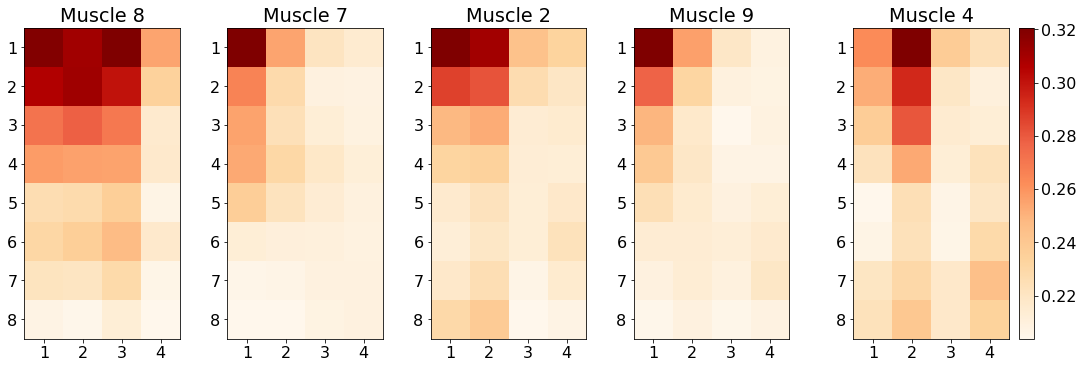

In [213]:
y_mu_mapped_arr = np.squeeze(np.load('output/rat_mapping_2D_several_animals/y_mu_mapped_arr.npy'))
print(y_mu_mapped_arr.shape)  
# NOTE: y_mu_mapped_arr is in shape (num_hyperparams, num_muscles, *system_shape) or (*system.shape) if squeeze-able
# Show 5 muscles randomly
fig, ax = plt.subplots(1, 5, figsize=(15, 5), constrained_layout=True)
for i, muscle_index in enumerate(np.random.choice(range(y_mu_mapped_arr.shape[0]), ax.shape[0], replace=False)):
    im = ax[i].imshow(y_mu_mapped_arr[muscle_index], cmap='OrRd')
    ax[i].set_title('Muscle %d' % (muscle_index + 1))
    
plt.setp(ax, xticks=range(4), xticklabels=range(1, 5), yticks=range(8), yticklabels=range(1, 9))
fig.colorbar(im, ax=ax[-1])
plt.show()  

Let's see what algorithmic performance vs. num. queries looks like. This is essentially the same as the CSV above, but plotted nicely.

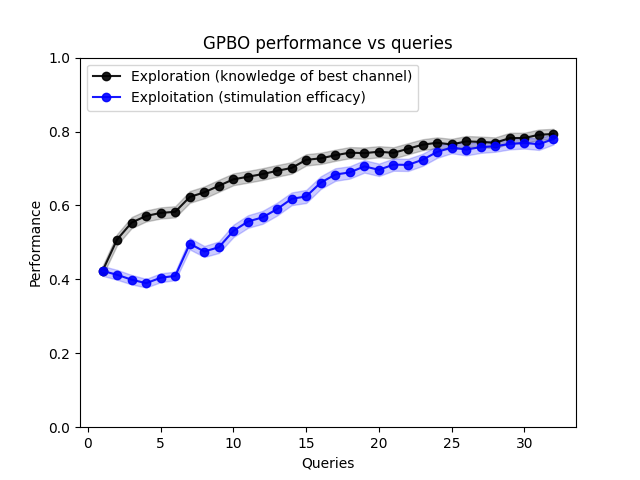

In [214]:
display(Image('output/rat_mapping_2D_several_animals/performance_vs_queries.png'))

In [83]:
!python main.py -c config/rat_mapping_2D.json \
                -nm 10 \
                -op output/rat_mapping_2D_several_animals_gpu \
                -hp "{'kappa': 3.0}" \
                -val \
                -gpu

Dataset (sub:muscle):  ['rat1_M1_190716:0', 'rat5_M1_191112:0', 'rat2_M1_190617:6', 'rat4_M1_191109:0', 'rat5_M1_191112:2', 'rat3_M1_190728:2', 'rat6_M1_200218:6', 'rat6_M1_200218:2', 'rat1_M1_190716:1', 'rat3_M1_190728:7']
Hooray! Succesfully saved output files to output/rat_mapping_2D_several_animals_gpu.


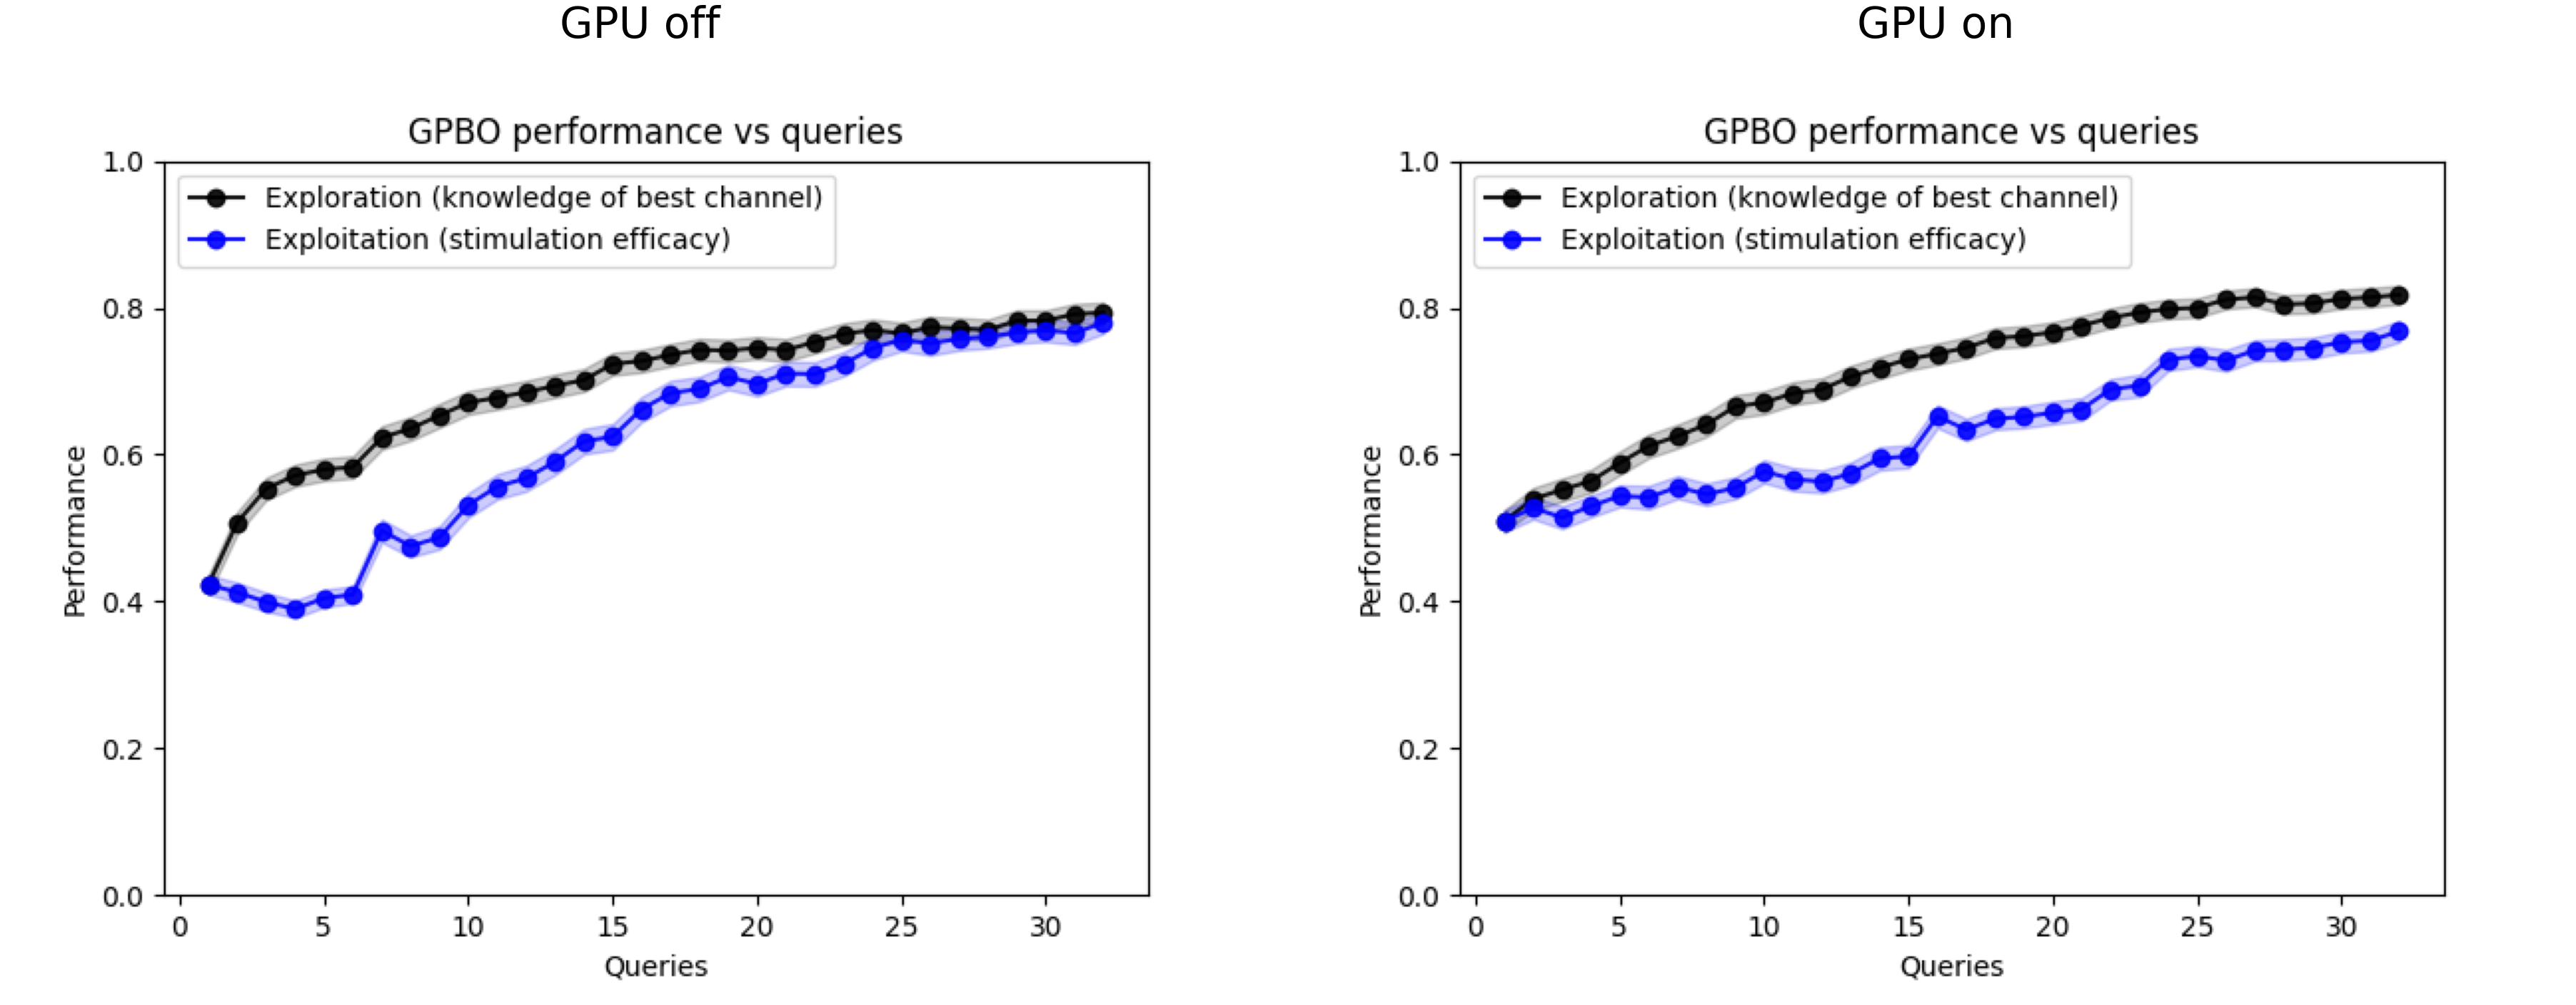

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/rat_mapping_2D_several_animals/performance_vs_queries.png'))
ax[0].axis('off')
ax[0].set_title('GPU off', fontsize=60)
ax[1].imshow(PIL_Image.open('output/rat_mapping_2D_several_animals_gpu/performance_vs_queries.png'))
ax[1].axis('off')
ax[1].set_title('GPU on', fontsize=60)
plt.show()

Now, let's run the same pipeline, but using the **extensive** search algorithm instead of the **GPBO** search algorithm as employed before.

In [215]:
!python main.py -c config/rat_mapping_2D.json \
                -nm 10 \
                -alg extensive \
                -op output/rat_mapping_2D_several_animals_extensive \
                -hp "{'kappa': 3.0}" \
                -val 

Iterating over repetitions:  97%|██████████████▌| 29/30 [00:44<00:01,  1.38s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
Hooray! Succesfully saved output files to output/rat_mapping_2D_several_animals_extensive.


We can quickly check the performance through the saved CSV file.

In [216]:
df_extensive = pd.read_csv('output/rat_mapping_2D_several_animals_extensive/extensive_performance.csv', index_col='queries')
df_extensive = df_extensive[['exploration', 'exploitation']].T
df_extensive

queries             1         2         3         4         5         6   \
exploration   0.404341  0.448241  0.474143  0.500755  0.510465  0.537788   
exploitation  0.404341  0.402212  0.401972  0.411289  0.403244  0.422560   

queries             7         8         9         10  ...        23        24  \
exploration   0.556186  0.579802  0.586151  0.592036  ...  0.652825  0.653314   
exploitation  0.391987  0.425179  0.405853  0.403774  ...  0.395998  0.420320   

queries             25        26        27        28        29        30  \
exploration   0.657110  0.667584  0.678045  0.680528  0.678677  0.682830   
exploitation  0.399149  0.411957  0.419296  0.402645  0.398403  0.417446   

queries             31        32  
exploration   0.688908  0.695320  
exploitation  0.393798  0.410493  

[2 rows x 32 columns]

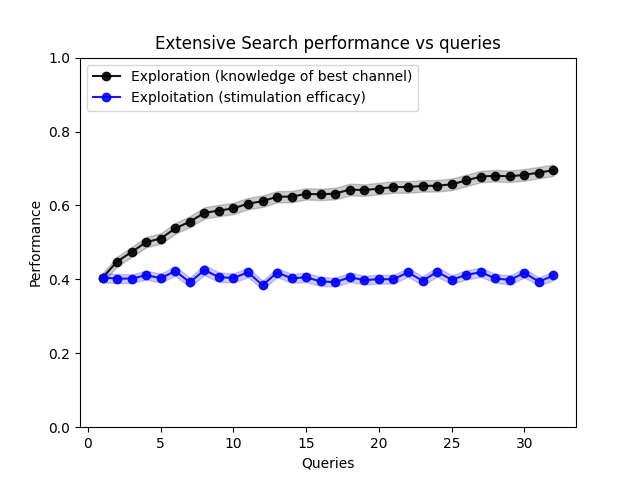

In [217]:
display(Image('output/rat_mapping_2D_several_animals_extensive/performance_vs_queries.png'))

In [3]:
!python main.py -c config/rat_mapping_2D.json \
                -nm 10 \
                -alg greedy \
                -op output/rat_mapping_2D_several_animals_greedy \
                -hp "{'kappa': 3.0}" \
                -val 

Dataset (sub:muscle):  ['rat1_M1_190716:0', 'rat5_M1_191112:0', 'rat2_M1_190617:6', 'rat4_M1_191109:0', 'rat5_M1_191112:2', 'rat3_M1_190728:2', 'rat6_M1_200218:6', 'rat6_M1_200218:2', 'rat1_M1_190716:1', 'rat3_M1_190728:7']
Iterating over repetitions:  57%|████████▌      | 17/30 [00:19<00:15,  1.16s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
Hooray! Succesfully saved output files to output/rat_mapping_2D_several_animals_greedy.


In [4]:
df_greedy = pd.read_csv('output/rat_mapping_2D_several_animals_greedy/greedy_performance.csv', index_col='queries')
df_greedy = df_greedy[['exploration', 'exploitation']].T
df_greedy

queries            1         2         3         4         5         6   \
exploration   0.51398  0.528040  0.548038  0.563010  0.597039  0.594693   
exploitation  0.51398  0.501903  0.491884  0.503101  0.556498  0.509528   

queries             7         8         9         10  ...        23        24  \
exploration   0.599401  0.600499  0.629256  0.638214  ...  0.719321  0.720387   
exploitation  0.515274  0.523519  0.567804  0.532905  ...  0.508534  0.522529   

queries             25        26        27        28        29        30  \
exploration   0.729115  0.728439  0.731103  0.733848  0.733653  0.736360   
exploitation  0.525299  0.499687  0.517041  0.503449  0.511079  0.517555   

queries             31        32  
exploration   0.735660  0.735691  
exploitation  0.514858  0.515987  

[2 rows x 32 columns]

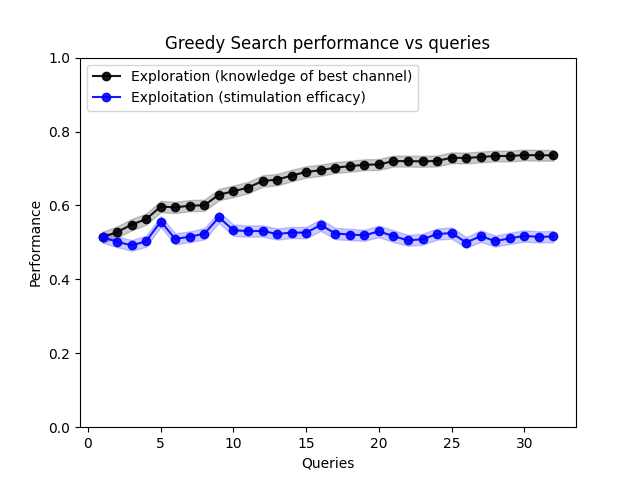

In [5]:
display(Image('output/rat_mapping_2D_several_animals_greedy/performance_vs_queries.png'))

Finally, we can compare the two algorithms on the same plot for (i) exploration and (ii) exploitation using the command given below.

In [6]:
!python scripts/compare_and_plot.py -r1 output/rat_mapping_2D_several_animals \
                                    -r2 output/rat_mapping_2D_several_animals_extensive \
                                    -r3 output/rat_mapping_2D_several_animals_greedy

Hooray! Successfully compared and plotted the runs!


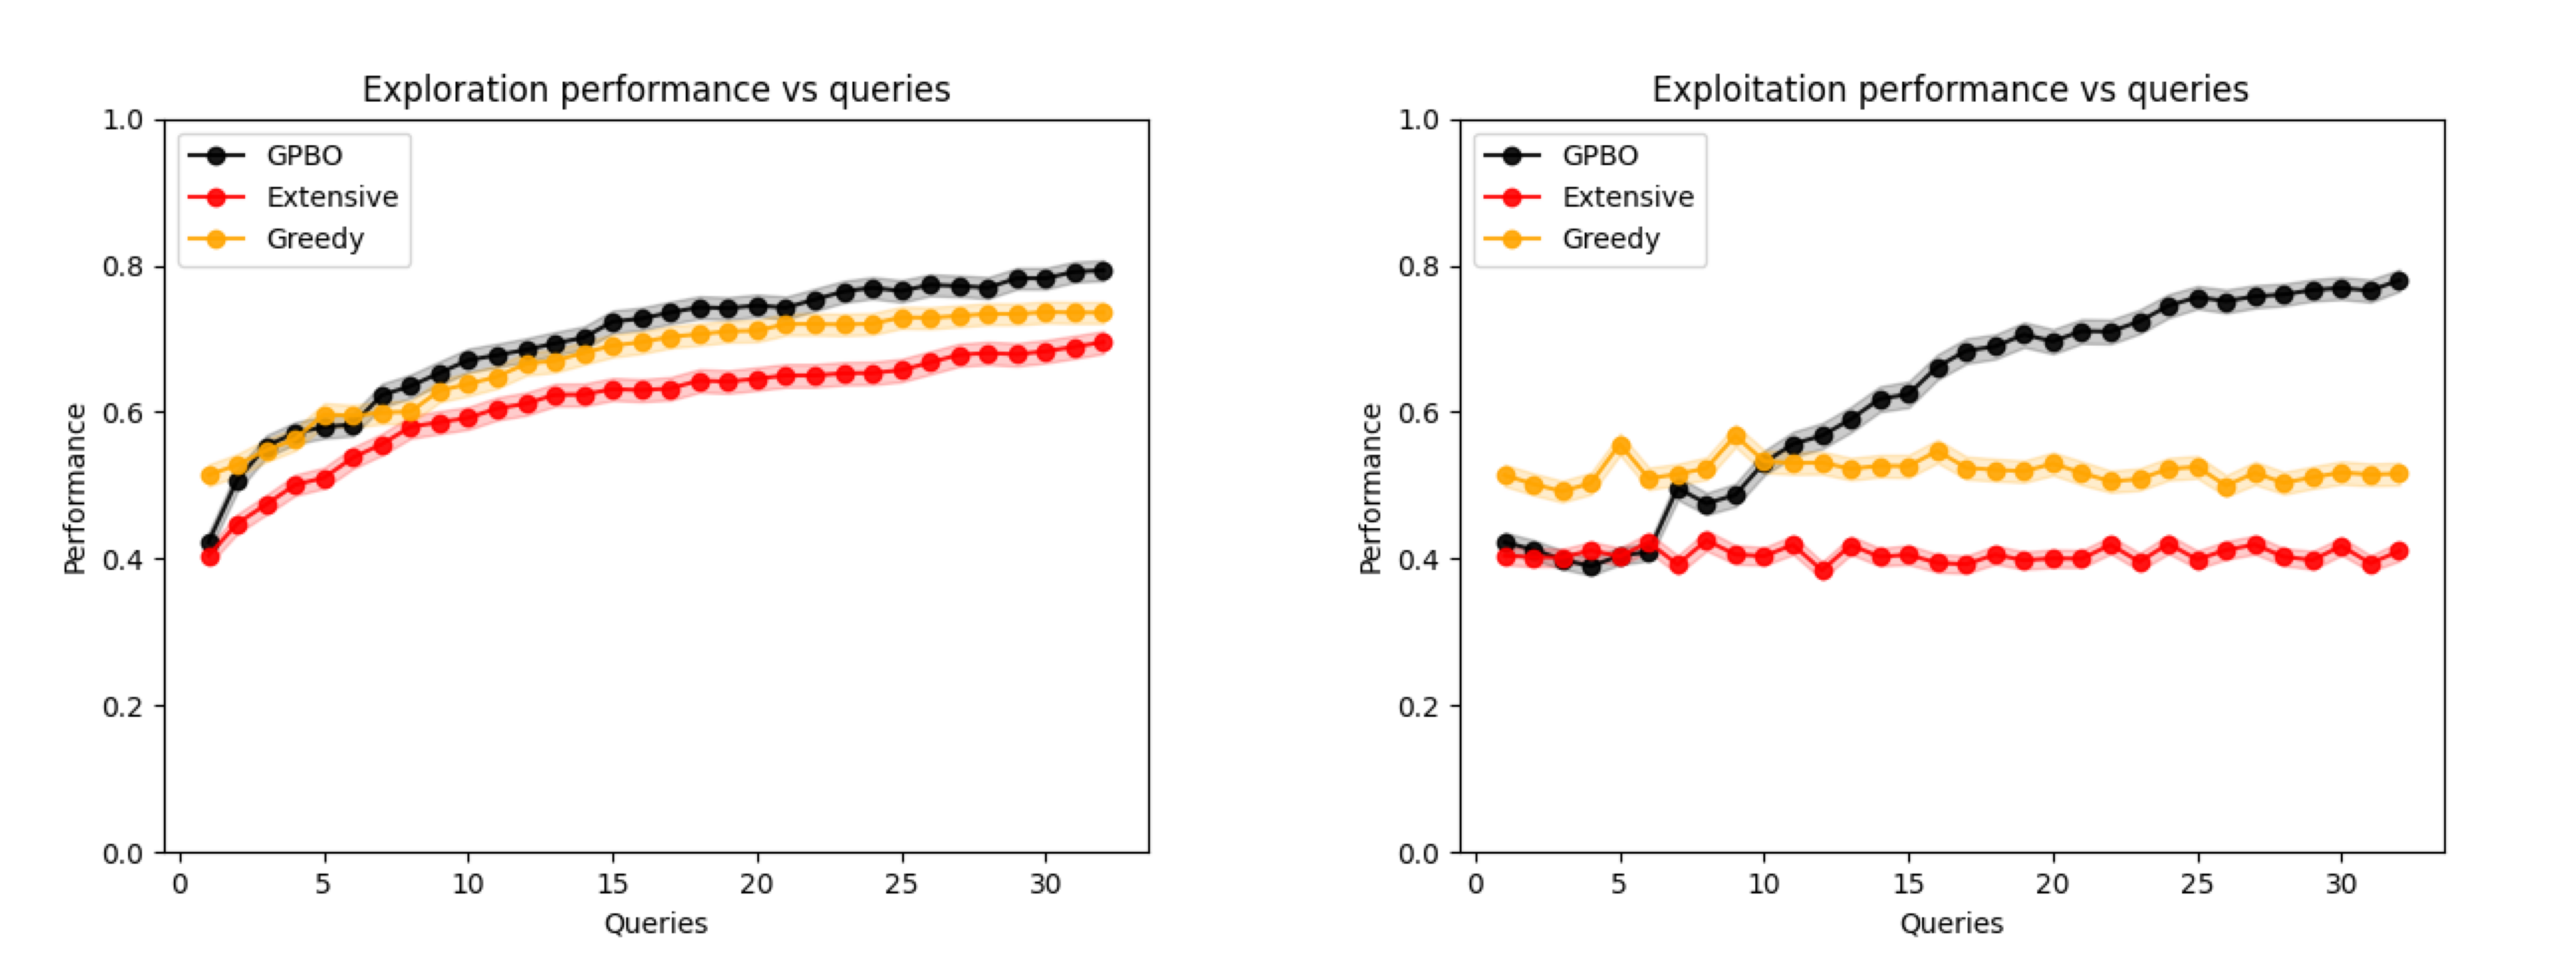

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/rat_mapping_2D_several_animals/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/rat_mapping_2D_several_animals/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Running validation on all replicates

In [83]:
!python main.py -c config/rat_mapping_2D.json \
                -op output/rat_mapping_2D_all \
                -hp "{'kappa': 3.0}" \
                -val

Dataset (sub:muscle):  ['rat1_M1_190716:0', 'rat5_M1_191112:0', 'rat2_M1_190617:6', 'rat4_M1_191109:0', 'rat5_M1_191112:2', 'rat3_M1_190728:2', 'rat6_M1_200218:6', 'rat6_M1_200218:2', 'rat1_M1_190716:1', 'rat3_M1_190728:7', 'rat2_M1_190617:1', 'rat1_M1_190716:5', 'rat2_M1_190617:4', 'rat3_M1_190728:0', 'rat3_M1_190728:1', 'rat6_M1_200218:5', 'rat4_M1_191109:1', 'rat6_M1_200218:7', 'rat4_M1_191109:2', 'rat3_M1_190728:4', 'rat2_M1_190617:2', 'rat6_M1_200218:3', 'rat1_M1_190716:3', 'rat6_M1_200218:1', 'rat2_M1_190617:3', 'rat1_M1_190716:4', 'rat6_M1_200218:4', 'rat2_M1_190617:0', 'rat5_M1_191112:1', 'rat3_M1_190728:5', 'rat2_M1_190617:5', 'rat5_M1_191112:3', 'rat3_M1_190728:6', 'rat4_M1_191109:4', 'rat5_M1_191112:4', 'rat6_M1_200218:0', 'rat3_M1_190728:3', 'rat1_M1_190716:2', 'rat4_M1_191109:5', 'rat4_M1_191109:3']
Iterating over repetitions:  57%|████████▌      | 17/30 [00:27<00:24,  1.91s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeW

In [71]:
!python main.py -c config/rat_mapping_2D.json \
                -alg extensive \
                -op output/rat_mapping_2D_all_extensive \
                -hp "{'kappa': 3.0}" \
                -val

Dataset (sub:muscle):  ['rat1_M1_190716:0', 'rat5_M1_191112:0', 'rat2_M1_190617:6', 'rat4_M1_191109:0', 'rat5_M1_191112:2', 'rat3_M1_190728:2', 'rat6_M1_200218:6', 'rat6_M1_200218:2', 'rat1_M1_190716:1', 'rat3_M1_190728:7', 'rat2_M1_190617:1', 'rat1_M1_190716:5', 'rat2_M1_190617:4', 'rat3_M1_190728:0', 'rat3_M1_190728:1', 'rat6_M1_200218:5', 'rat4_M1_191109:1', 'rat6_M1_200218:7', 'rat4_M1_191109:2', 'rat3_M1_190728:4', 'rat2_M1_190617:2', 'rat6_M1_200218:3', 'rat1_M1_190716:3', 'rat6_M1_200218:1', 'rat2_M1_190617:3', 'rat1_M1_190716:4', 'rat6_M1_200218:4', 'rat2_M1_190617:0', 'rat5_M1_191112:1', 'rat3_M1_190728:5', 'rat2_M1_190617:5', 'rat5_M1_191112:3', 'rat3_M1_190728:6', 'rat4_M1_191109:4', 'rat5_M1_191112:4', 'rat6_M1_200218:0', 'rat3_M1_190728:3', 'rat1_M1_190716:2', 'rat4_M1_191109:5', 'rat4_M1_191109:3']
Iterating over repetitions:   0%|                        | 0/30 [00:00<?, ?it/s] main.py:469: RuntimeWarning:Mean of empty slice
 main.py:465: RuntimeWarning:invalid value enco

In [72]:
!python main.py -c config/rat_mapping_2D.json \
                -alg greedy \
                -op output/rat_mapping_2D_all_greedy \
                -hp "{'kappa': 3.0}" \
                -val 

Dataset (sub:muscle):  ['rat1_M1_190716:0', 'rat5_M1_191112:0', 'rat2_M1_190617:6', 'rat4_M1_191109:0', 'rat5_M1_191112:2', 'rat3_M1_190728:2', 'rat6_M1_200218:6', 'rat6_M1_200218:2', 'rat1_M1_190716:1', 'rat3_M1_190728:7', 'rat2_M1_190617:1', 'rat1_M1_190716:5', 'rat2_M1_190617:4', 'rat3_M1_190728:0', 'rat3_M1_190728:1', 'rat6_M1_200218:5', 'rat4_M1_191109:1', 'rat6_M1_200218:7', 'rat4_M1_191109:2', 'rat3_M1_190728:4', 'rat2_M1_190617:2', 'rat6_M1_200218:3', 'rat1_M1_190716:3', 'rat6_M1_200218:1', 'rat2_M1_190617:3', 'rat1_M1_190716:4', 'rat6_M1_200218:4', 'rat2_M1_190617:0', 'rat5_M1_191112:1', 'rat3_M1_190728:5', 'rat2_M1_190617:5', 'rat5_M1_191112:3', 'rat3_M1_190728:6', 'rat4_M1_191109:4', 'rat5_M1_191112:4', 'rat6_M1_200218:0', 'rat3_M1_190728:3', 'rat1_M1_190716:2', 'rat4_M1_191109:5', 'rat4_M1_191109:3']
Iterating over repetitions:   0%|                        | 0/30 [00:00<?, ?it/s] main.py:469: RuntimeWarning:Mean of empty slice
Hooray! Succesfully saved output files to outpu

In [73]:
!python scripts/compare_and_plot.py -r1 output/rat_mapping_2D_all \
                                    -r2 output/rat_mapping_2D_all_extensive \
                                    -r3 output/rat_mapping_2D_all_greedy

Hooray! Successfully compared and plotted the runs!


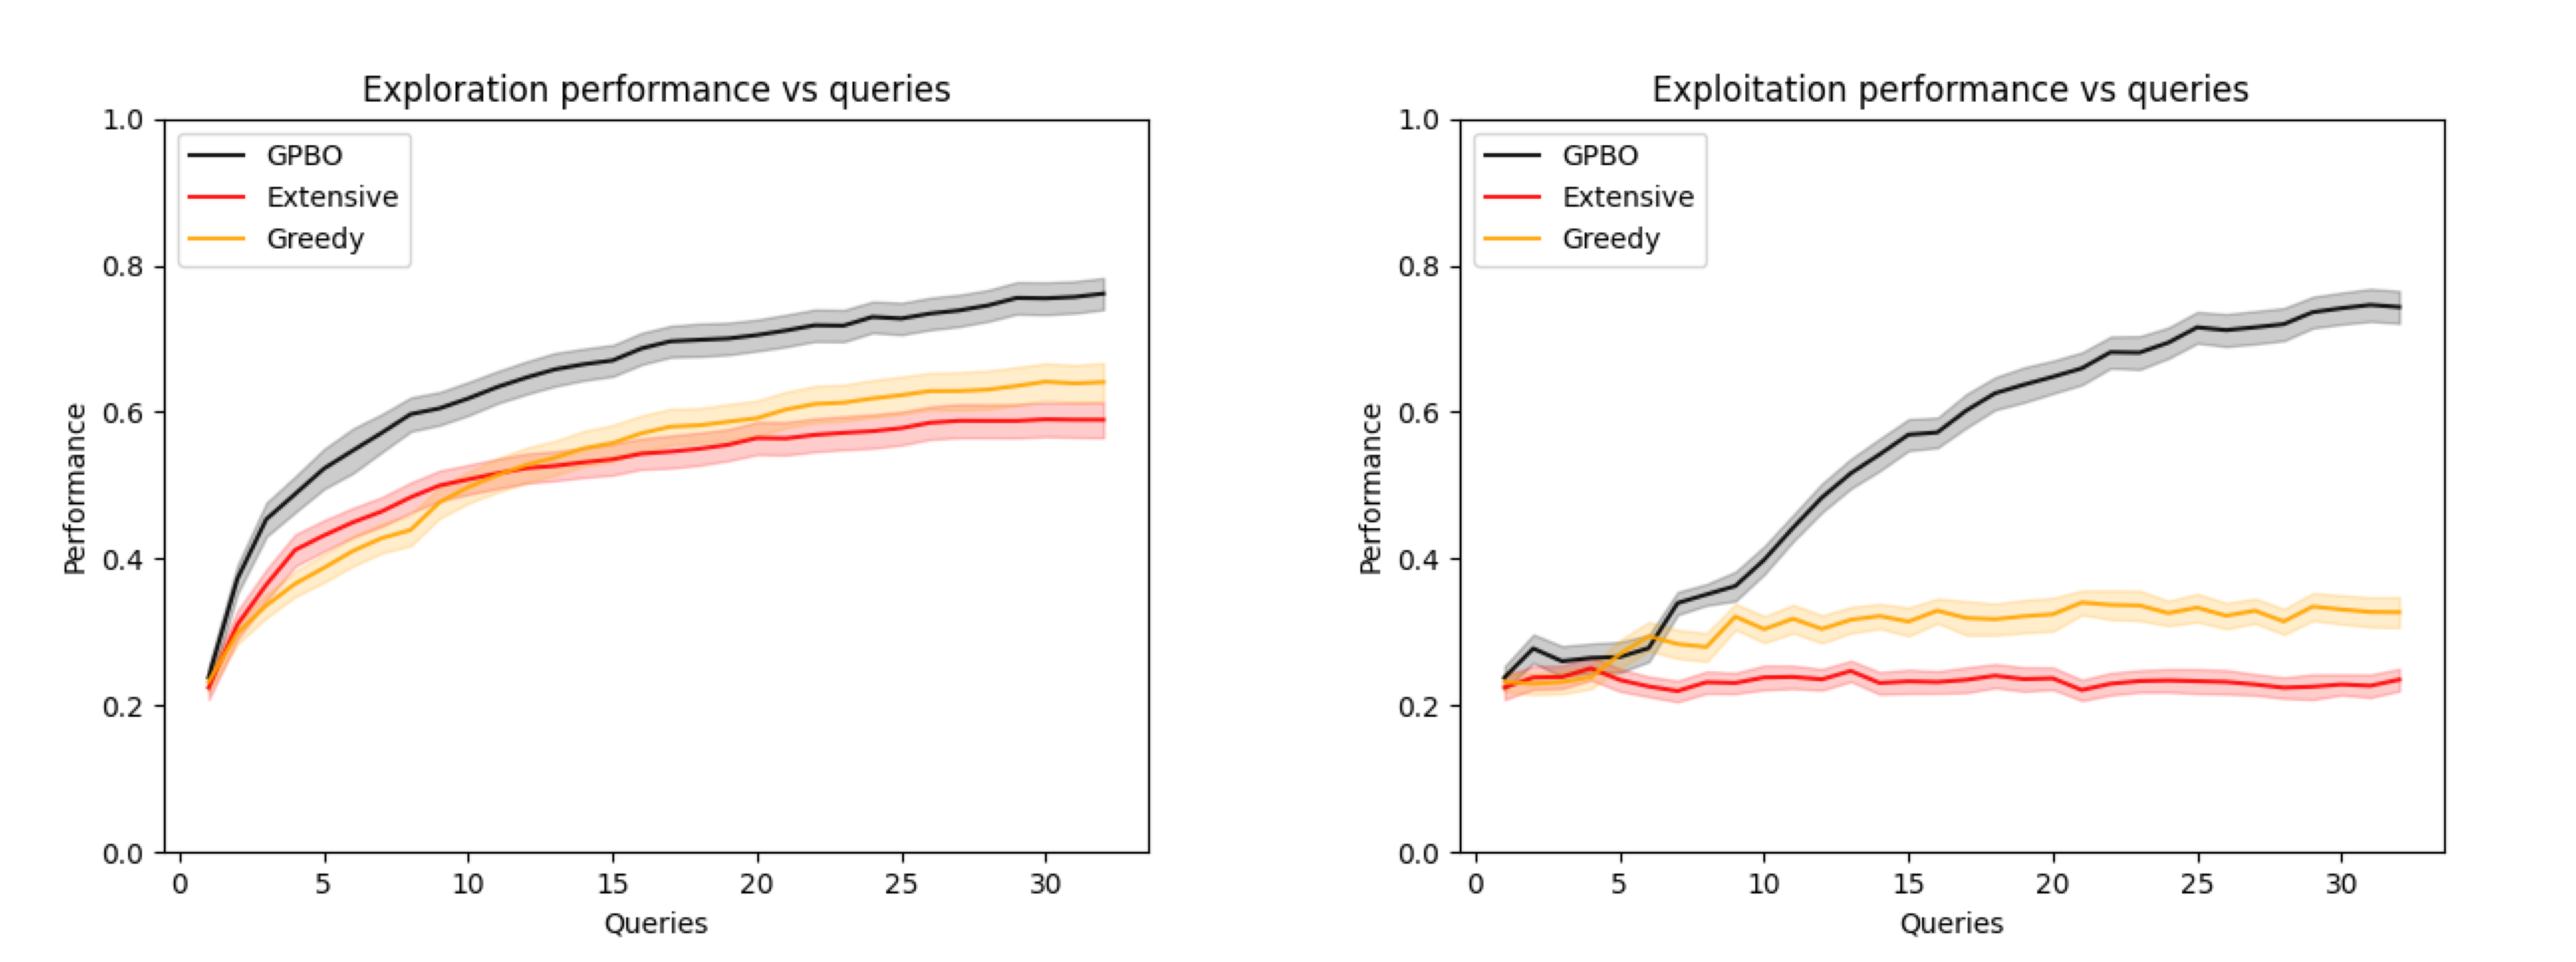

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/rat_mapping_2D_all/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/rat_mapping_2D_all/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Step 6: Run offline hyperpamater optimization

Now that we saw how `optim-neurostim` can be utilized to run validation experiments, let's see how we decided on the best value for `kappa`. Now, we will run the command without any additional flags to perform offline hyperparameter optimization. As discussed before, the config file encodes all of the necessary information.

In [4]:
!python main.py -c config/rat_mapping_2D.json \
                -op output/rat_mapping_2D

Iterating over repetitions:  27%|████▎           | 8/30 [00:09<00:26,  1.19s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/paramz/transformations.py:119: RuntimeWarning:overflow encountered in expm1
Iterating over repetitions:  27%|████▎           | 8/30 [00:09<00:26,  1.20s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:overflow encountered in add
Hooray! Succesfully saved output files to output/rat_mapping_2D.                


Let's first see what the algorithmic performance looks like for different values of hyperparameter `kappa`.

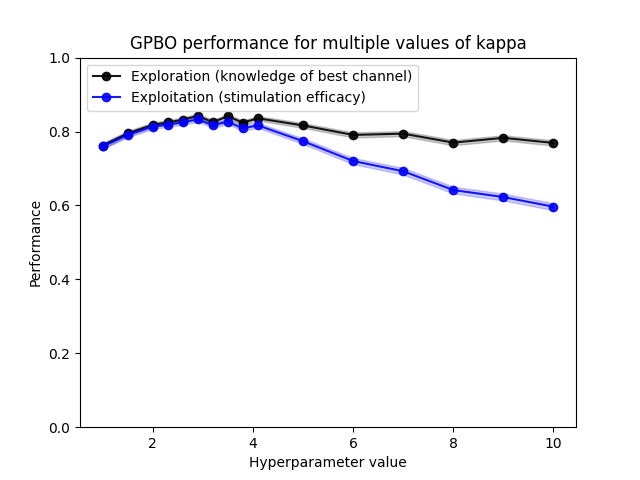

In [5]:
display(Image('output/rat_mapping_2D/performance_for_kappa.png'))

This command also gives us a `.pkl` containing the best values for hyperparameters which we can pass onto validation experiments later. Let's investigate this below.

In [6]:
with open('output/rat_mapping_2D/best_hyperparams.pkl', 'rb') as f:
    d = pickle.load(f)

print(d)

{'kappa': 2.9}
